**Технологии МО. Разведочный анализ и предобработка данных.**

Черединова Ксения, фит-2
Датасет - https://archive.ics.uci.edu/dataset/59/letter+recognition

In [ ]:
# Устанавливаем библиотеку ucimlrepo
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from ucimlrepo import fetch_ucirepo

In [ ]:
data = fetch_ucirepo(id=59) # В data будем хранить набор данных (id=59 - датасет letter recognition)
print(data.metadata)        # Выводим метаданные

{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

In [ ]:
df = data['data']['features']
df['target'] = data.data.targets

In [ ]:
df.info() # Выводим краткую информацию о наборе данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x-box   20000 non-null  int64 
 1   y-box   20000 non-null  int64 
 2   width   20000 non-null  int64 
 3   high    20000 non-null  int64 
 4   onpix   20000 non-null  int64 
 5   x-bar   20000 non-null  int64 
 6   y-bar   20000 non-null  int64 
 7   x2bar   20000 non-null  int64 
 8   y2bar   20000 non-null  int64 
 9   xybar   20000 non-null  int64 
 10  x2ybr   20000 non-null  int64 
 11  xy2br   20000 non-null  int64 
 12  x-ege   20000 non-null  int64 
 13  xegvy   20000 non-null  int64 
 14  y-ege   20000 non-null  int64 
 15  yegvx   20000 non-null  int64 
 16  target  20000 non-null  object
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


Таким образом,
- набор данных не содержит пустых значений
- 16 признаков типа int64
- 1 признак типа object (целевая переменная target)


In [ ]:
df.describe() # Выводим статическую информацию

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


Можно сделать вывод, что
- mean: большинство признаков имеют схожее ср. значение
- std: меньшее станд. откл. у столбца xegvy (1,5), а наибольшее у столбца y-box (3,3) => вариативность по столбцам отличается, но в целом умеренная
- min: во всех столбцах = 0
- 25%, 50%, 75%: значения близки к друг другу => данные распределены достатоно равномерно вокруг ср. знач.
- max: во всех столбцах = 15

In [ ]:
df.columns # Выводим названия столбцов

Index(['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar',
       'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx',
       'target'],
      dtype='object')

In [ ]:
df.head() # Выводим первые 5 записей

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,target
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G


In [ ]:
# Заменяем категориальные данные количественными

for column in df.columns:                        # проходимся по всем столбцам
    if df[column].dtype == object:               # если тип столбца имеет тип object (категор.)
        df[column] = pd.factorize(df[column])[0] # преобразуем при помощи pd.factorize категор. данные в колич.

In [ ]:
df.info() # Выводим краткую информацию о наборе данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x-box   20000 non-null  int64
 1   y-box   20000 non-null  int64
 2   width   20000 non-null  int64
 3   high    20000 non-null  int64
 4   onpix   20000 non-null  int64
 5   x-bar   20000 non-null  int64
 6   y-bar   20000 non-null  int64
 7   x2bar   20000 non-null  int64
 8   y2bar   20000 non-null  int64
 9   xybar   20000 non-null  int64
 10  x2ybr   20000 non-null  int64
 11  xy2br   20000 non-null  int64
 12  x-ege   20000 non-null  int64
 13  xegvy   20000 non-null  int64
 14  y-ege   20000 non-null  int64
 15  yegvx   20000 non-null  int64
 16  target  20000 non-null  int64
dtypes: int64(17)
memory usage: 2.6 MB


Видим, что тип данных столбца target изменился с object на int64

**ВИЗУАЛИЗАЦИЯ ДАННЫХ (для каждого признака)**

In [ ]:
def visual1(namecol):
    # Создаем фигуру с двумя подграфиками (1 ряд, 2 столбца)
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    # Подсчитываем количество значений и получаем проценты
    counts = df[namecol].value_counts()
    # Строим круговую диаграмму
    axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[0].set_title(f'Распределение {namecol}')  # Устанавливаем заголовок

    # Создаем гистограмму для распределения значений в выбранном признаке
    df[namecol].plot.hist(bins=15, ax=axes[1], color='skyblue', edgecolor='black')
    axes[1].set_title(f'Гистограмма {namecol}')  # Устанавливаем заголовок для первого подграфика
    axes[1].set_xlabel(namecol)  # Подписываем ось X
    axes[1].set_ylabel('Частота')  # Подписываем ось Y

    plt.tight_layout()  # Чтобы подграфики не накладывались друг на друга
    plt.show()          # Отображаем визуализацию

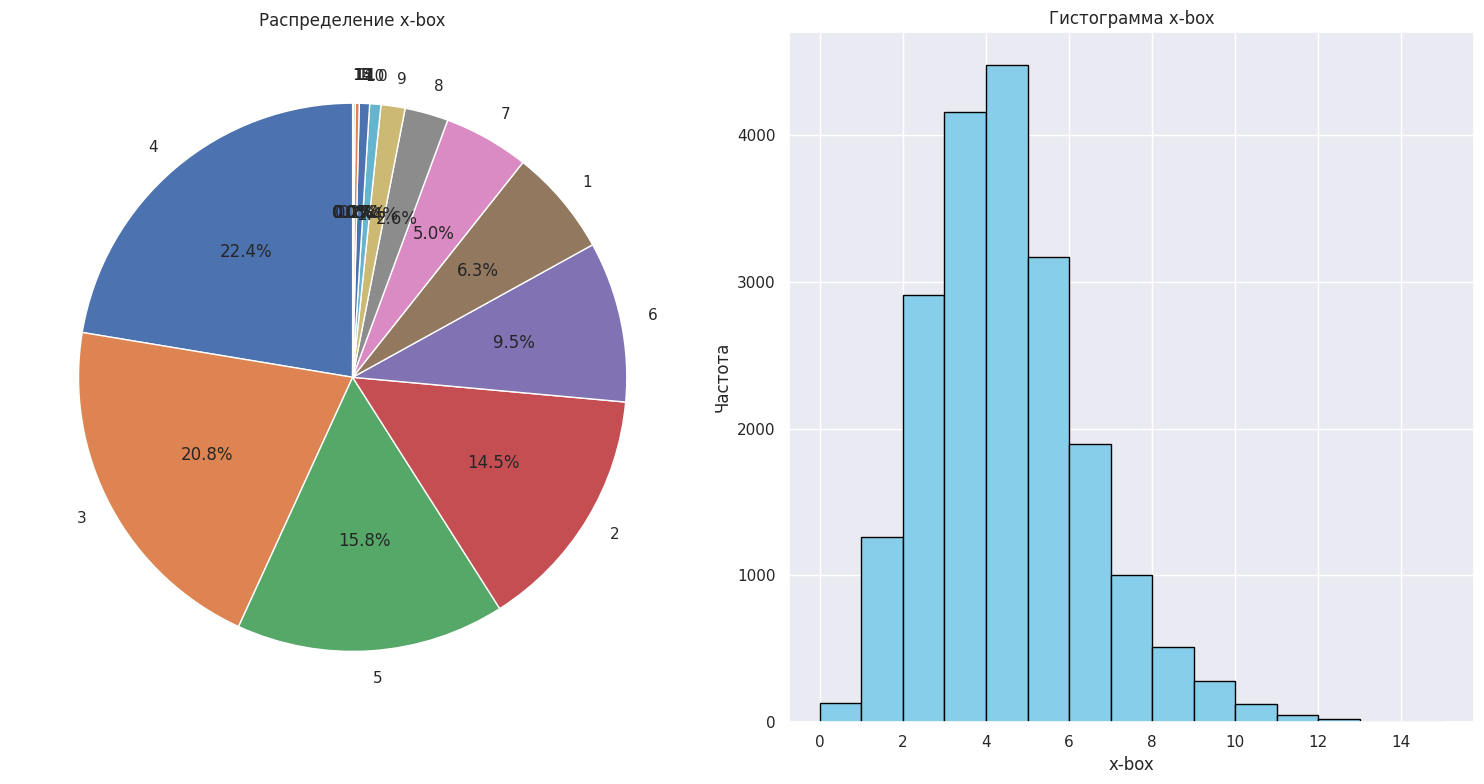

In [ ]:
visual1 ('x-box') # 0

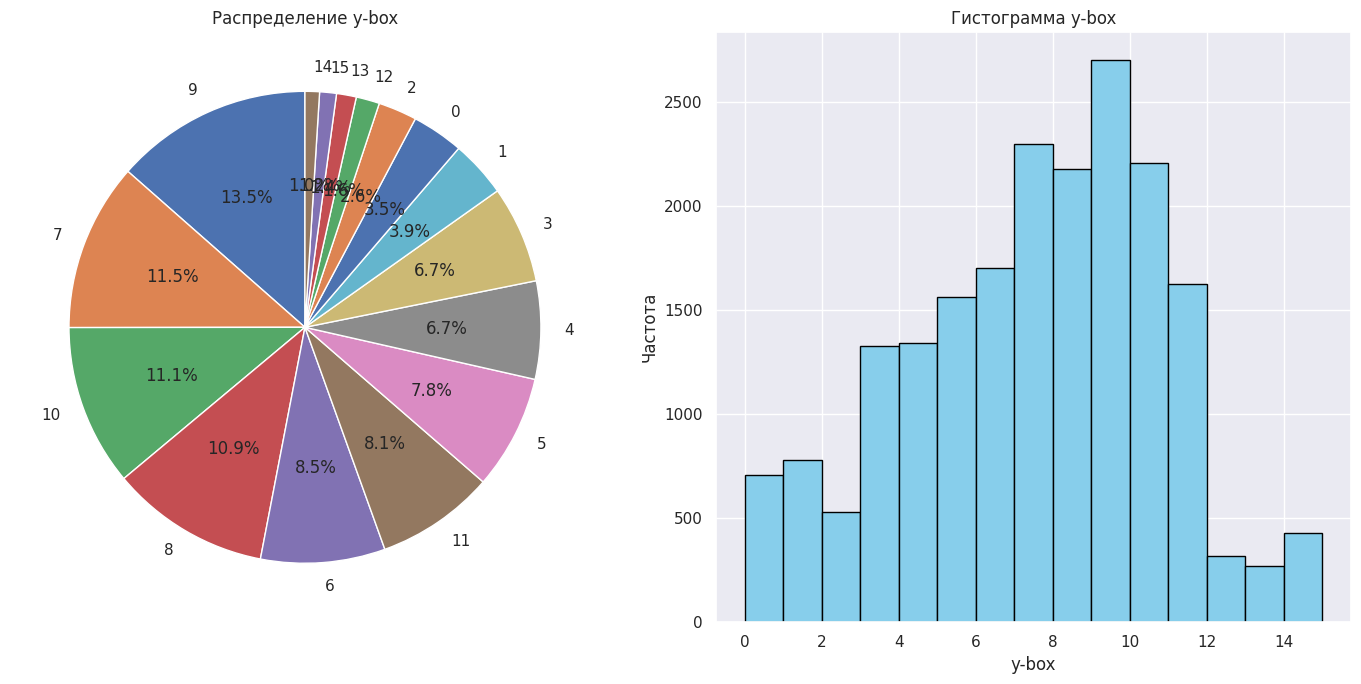

In [ ]:
visual1 ('y-box') # 1

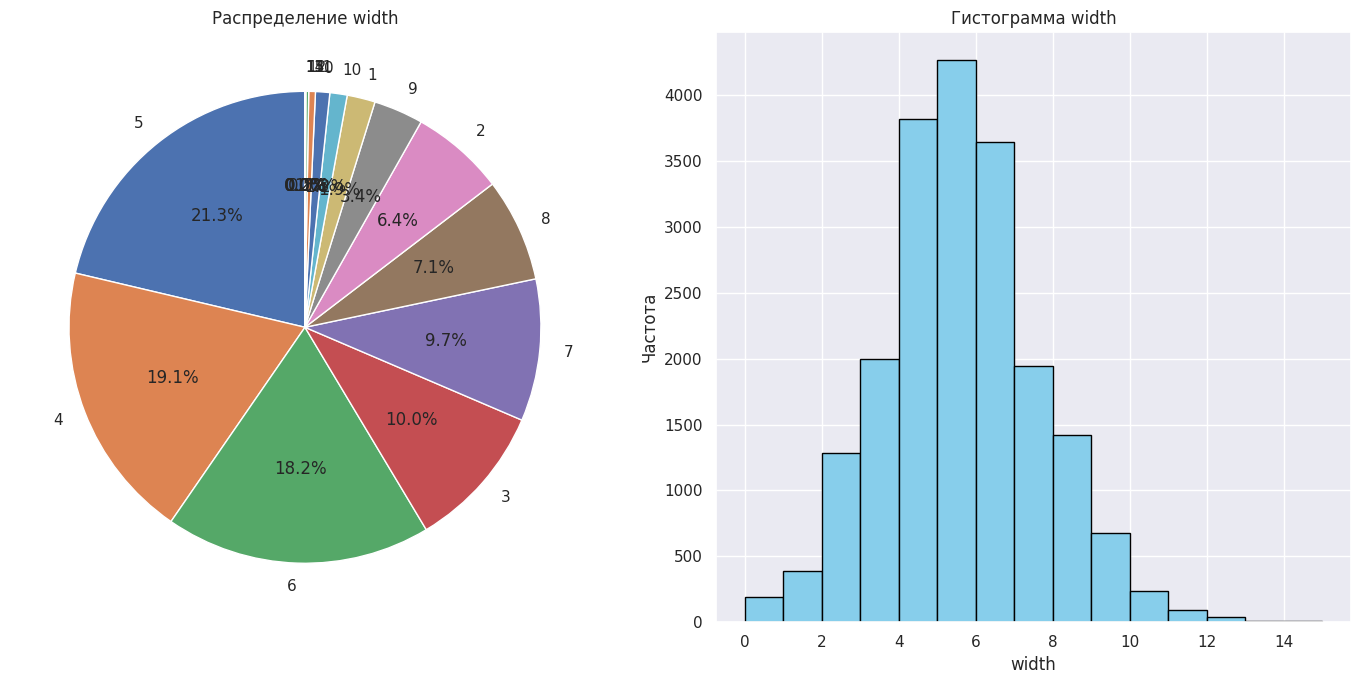

In [ ]:
visual1 ('width') # 2

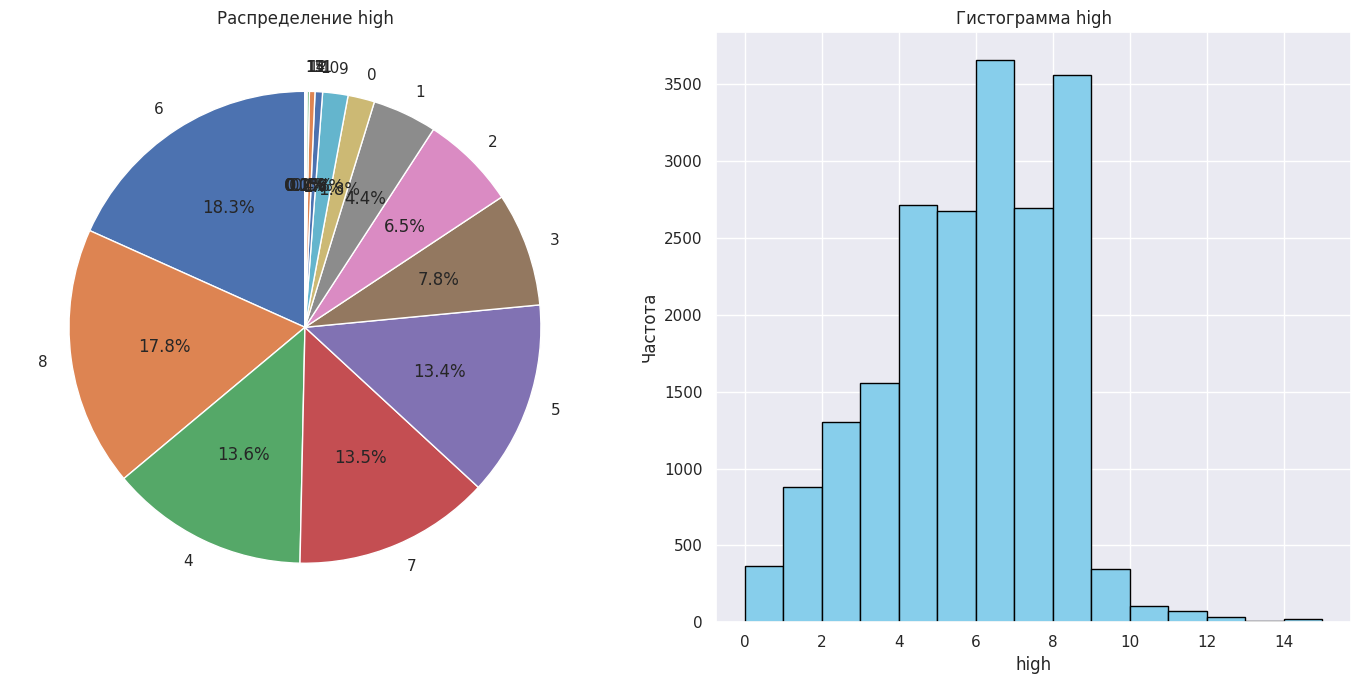

In [ ]:
visual1 ('high') # 3

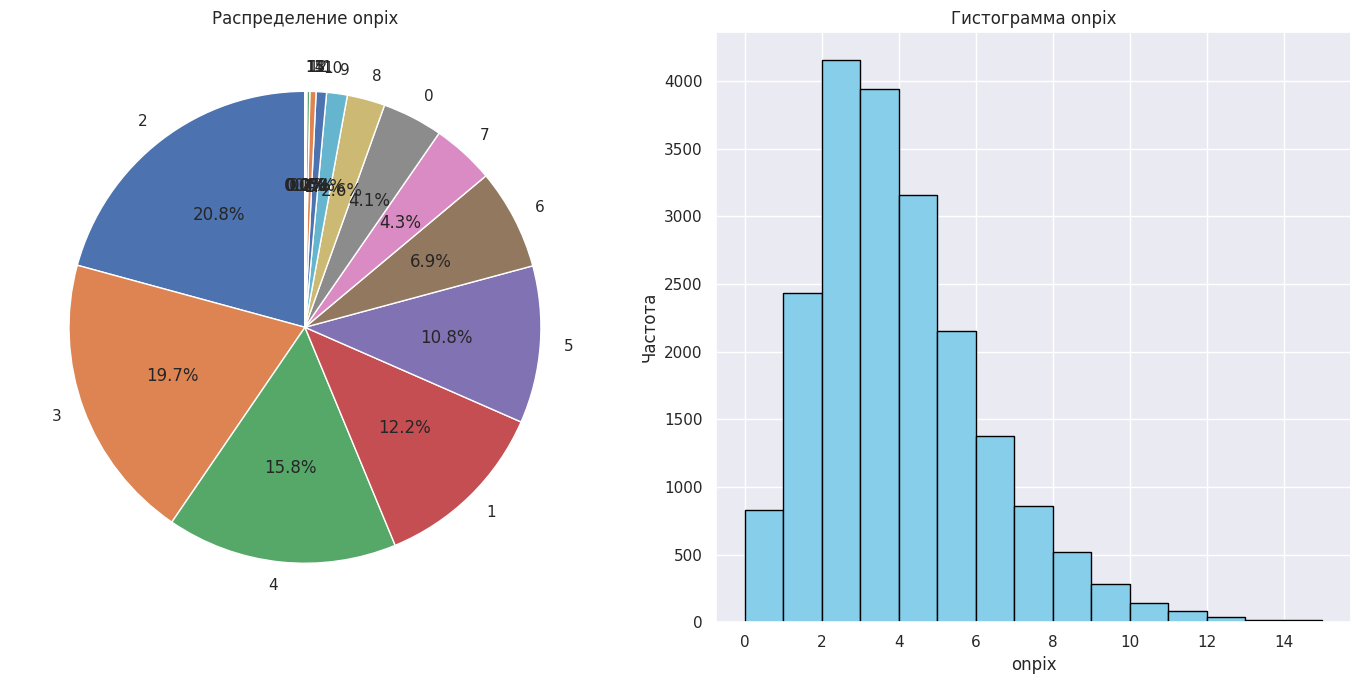

In [ ]:
visual1 ('onpix') # 4

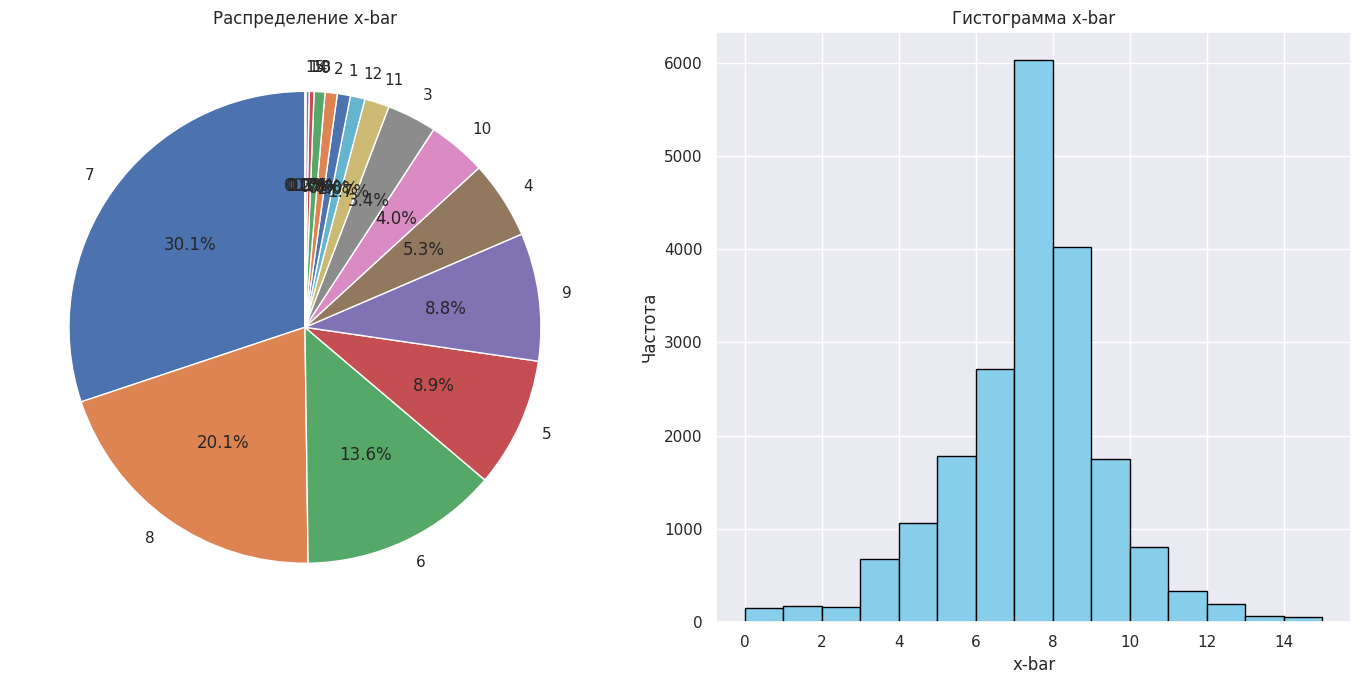

In [ ]:
visual1 ('x-bar') # 5

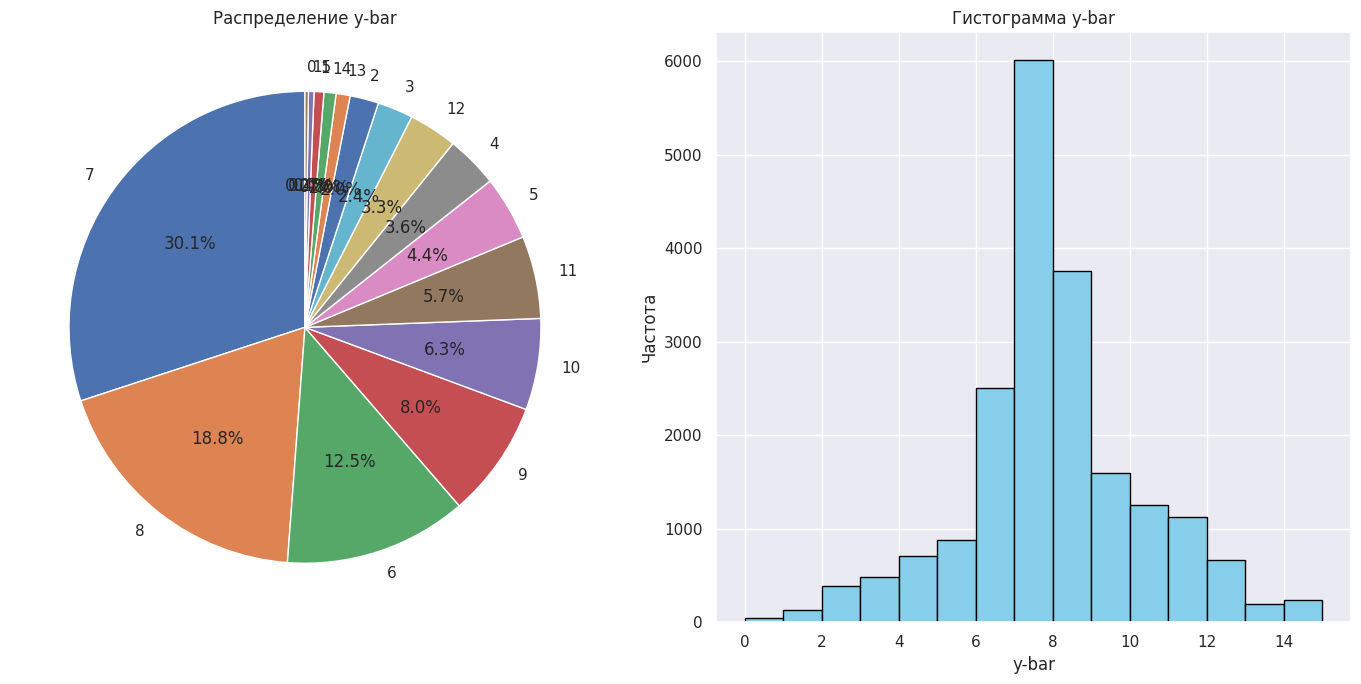

In [ ]:
visual1 ('y-bar') # 6

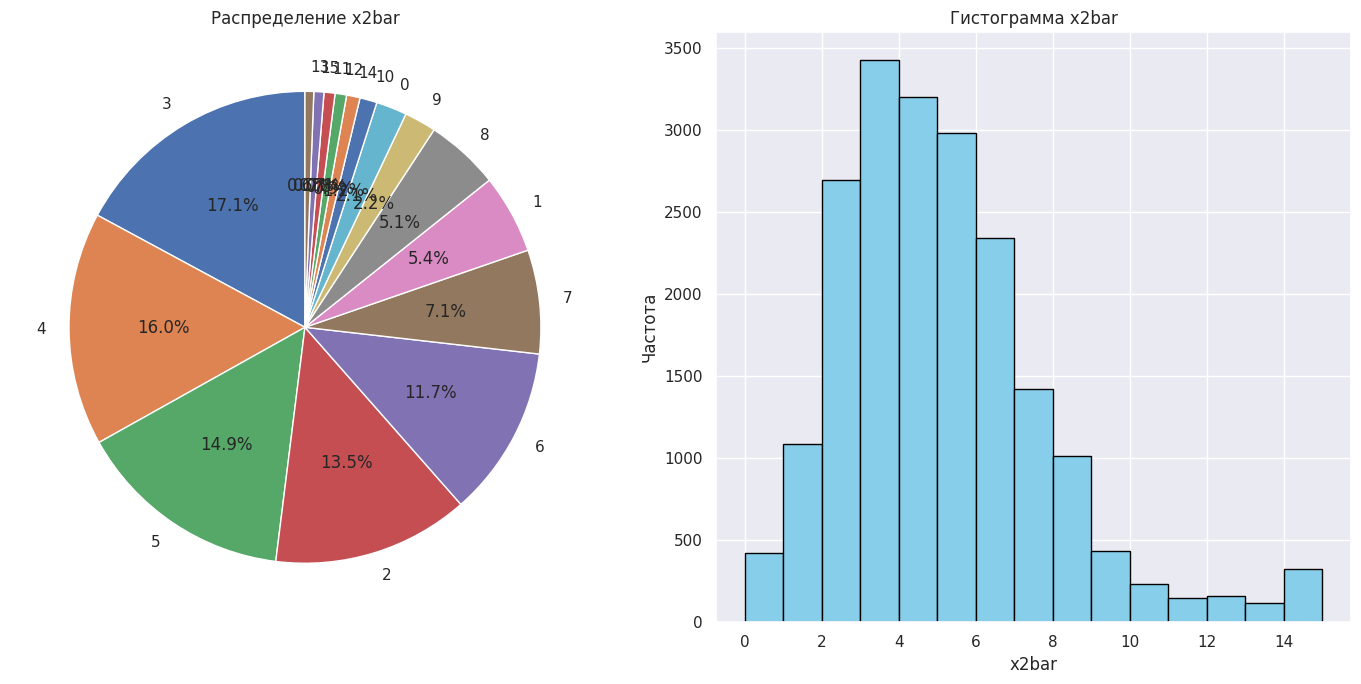

In [ ]:
visual1 ('x2bar') # 7

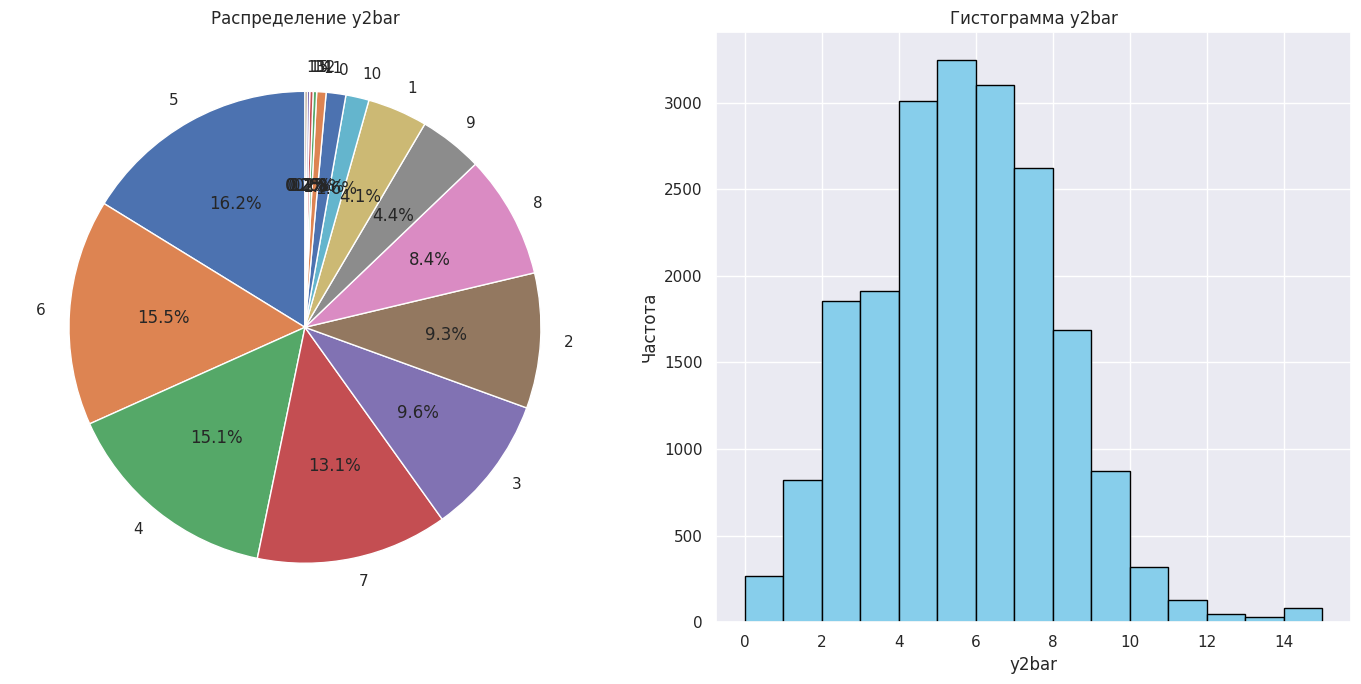

In [ ]:
visual1 ('y2bar') # 8

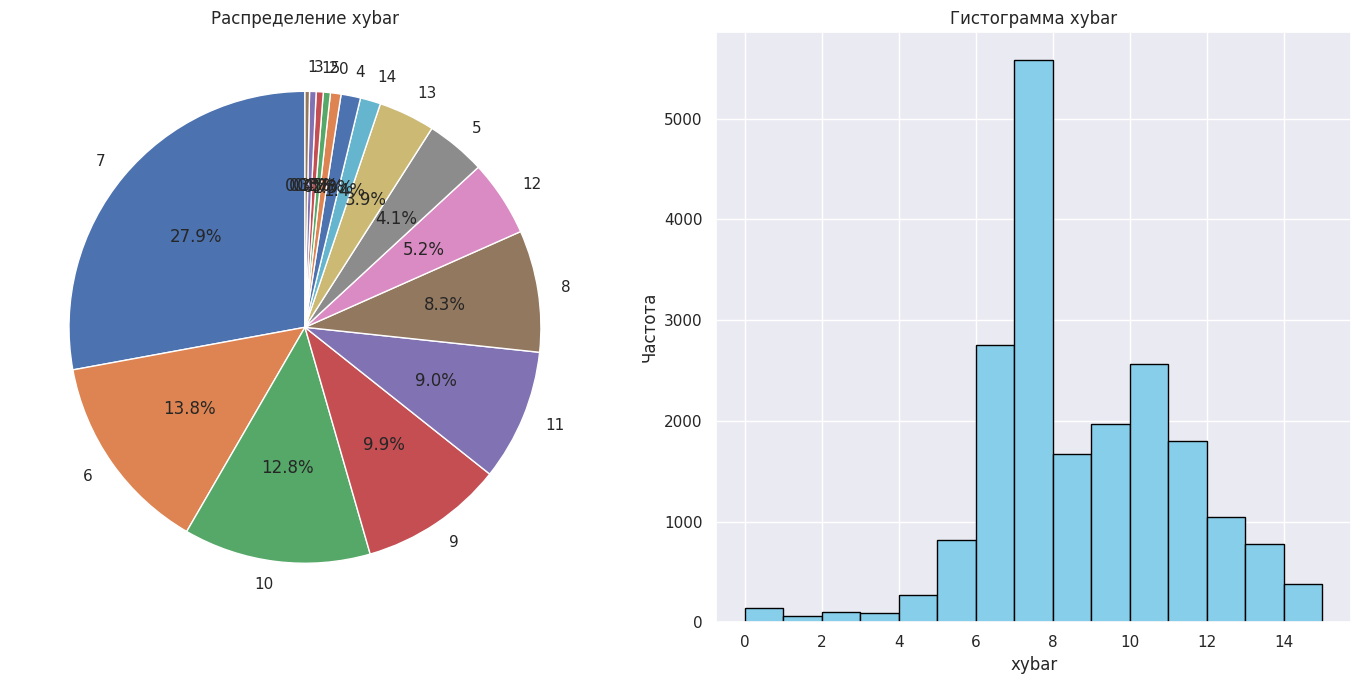

In [ ]:
visual1 ('xybar') # 9

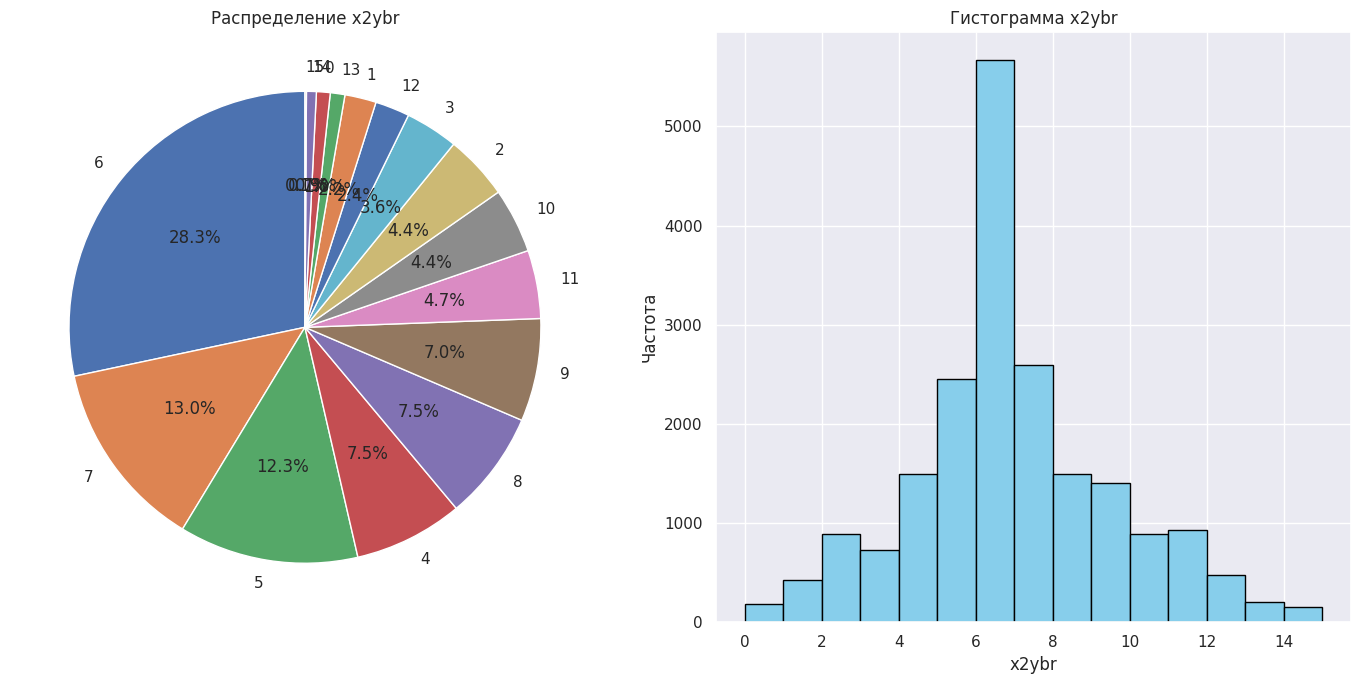

In [ ]:
visual1 ('x2ybr') # 10

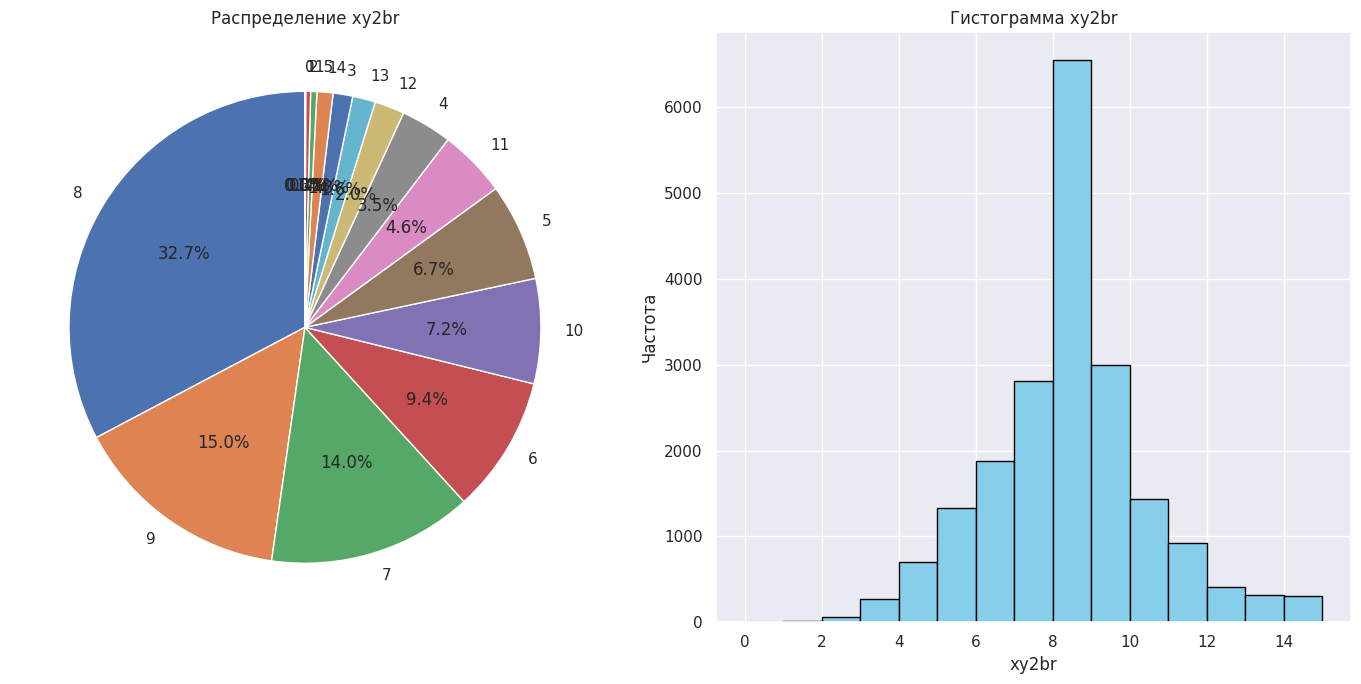

In [ ]:
visual1 ('xy2br') # 11

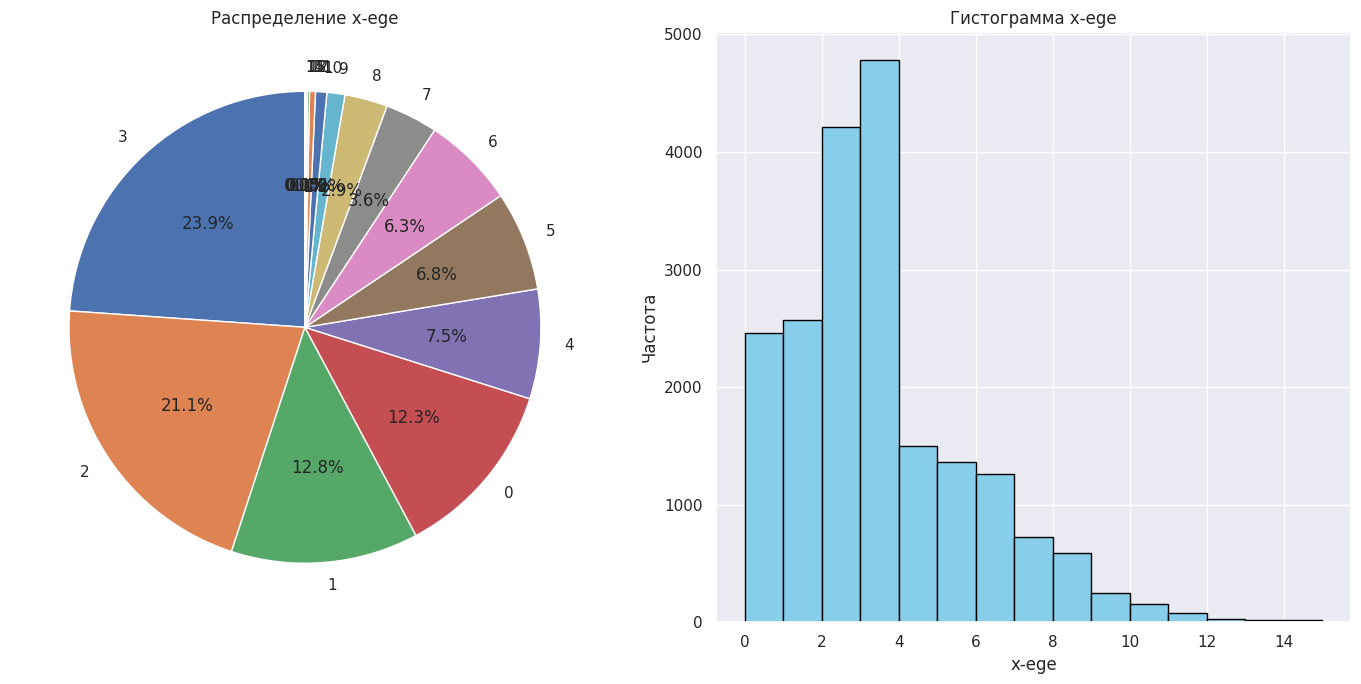

In [ ]:
visual1 ('x-ege') # 12

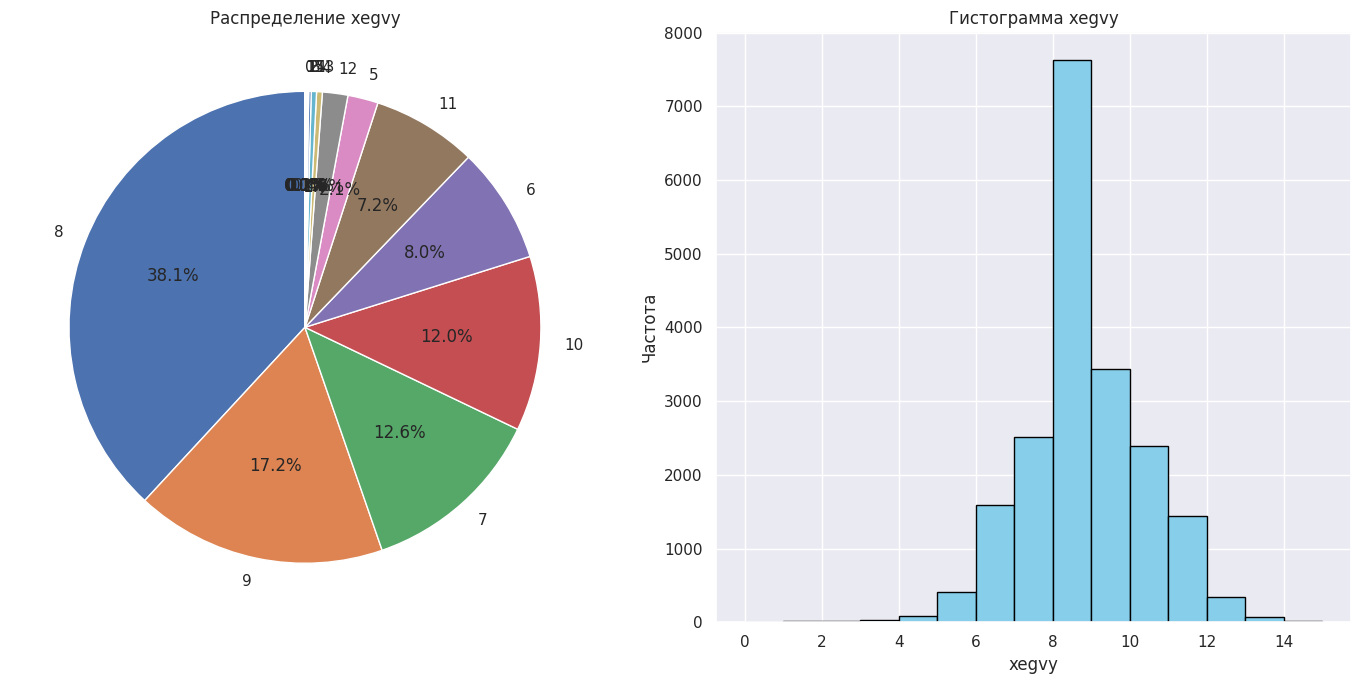

In [ ]:
visual1 ('xegvy') # 13

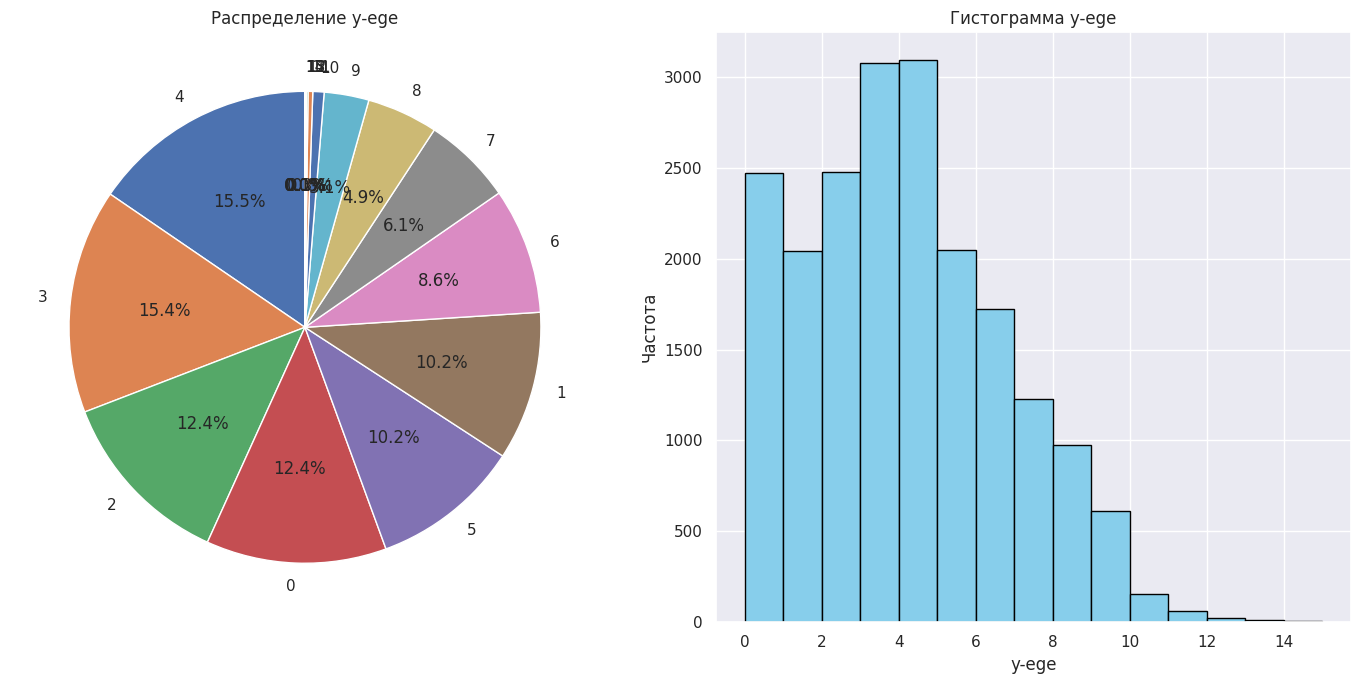

In [ ]:
visual1 ('y-ege') # 14

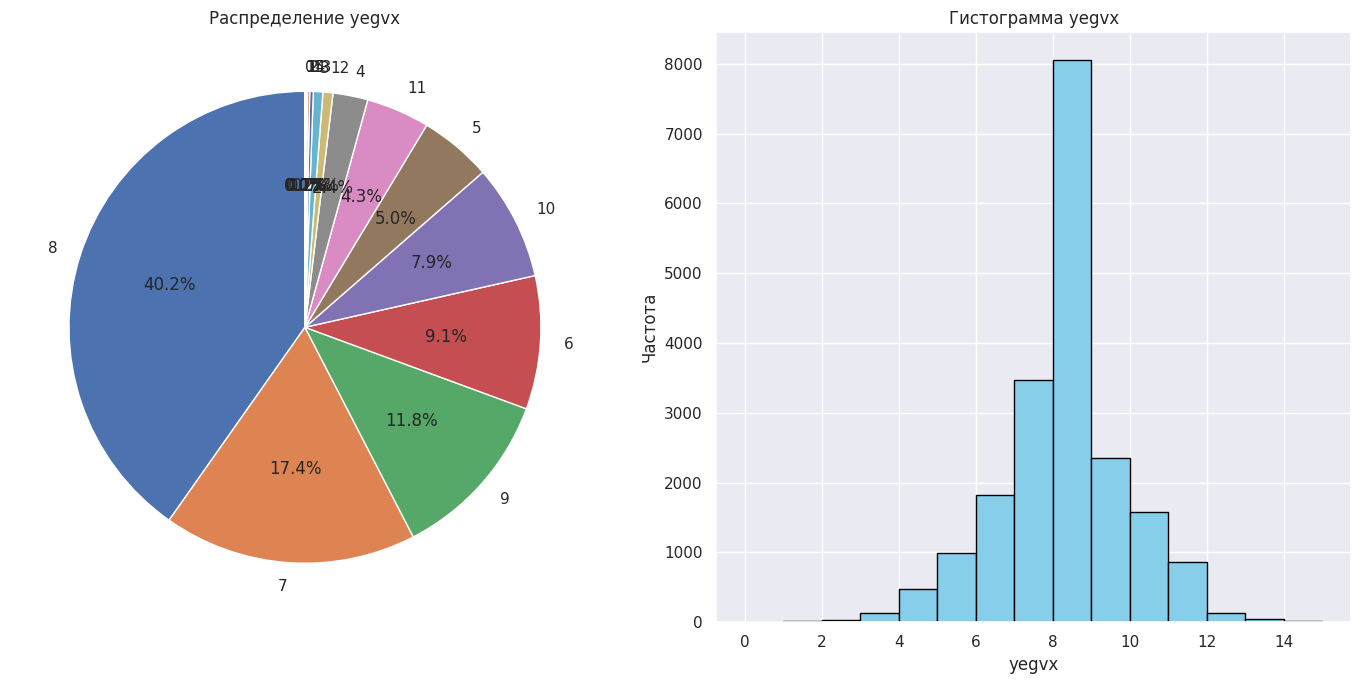

In [ ]:
visual1 ('yegvx') # 15

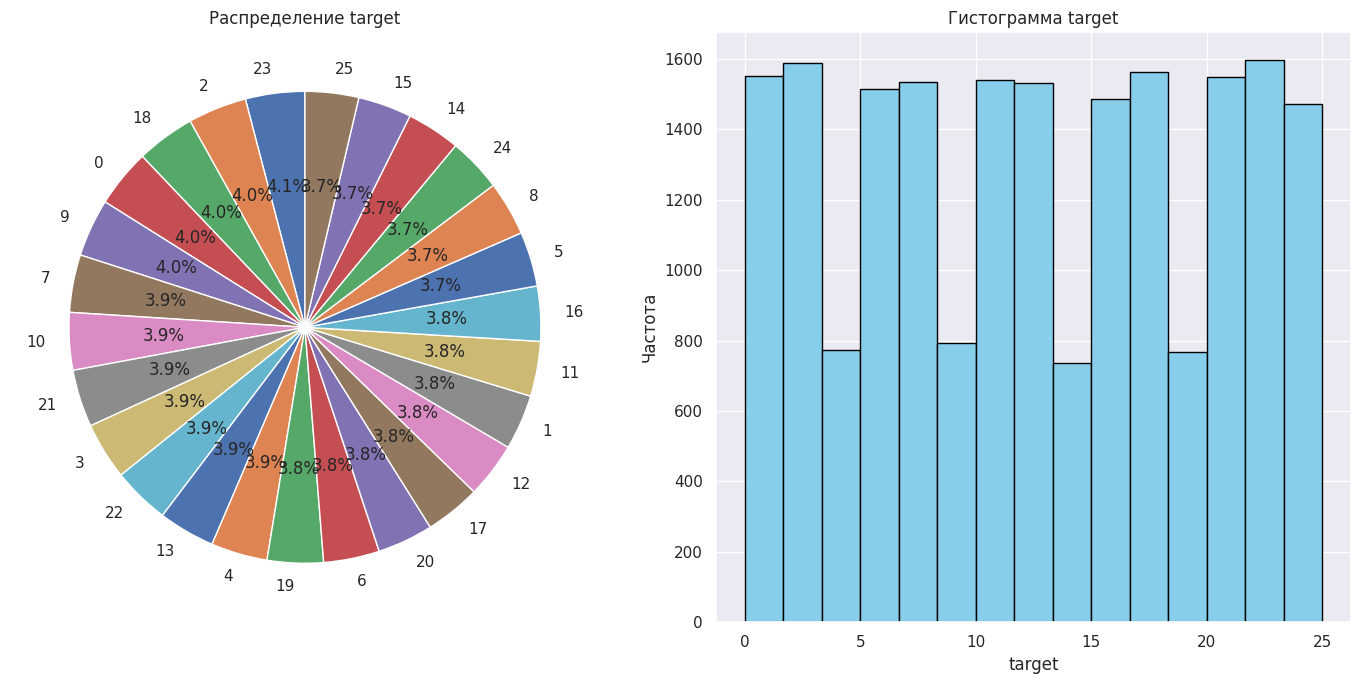

In [ ]:
visual1 ('target') # 16

**ГРУППОВЫЕ ВИЗУАЛИЗАЦИИ**

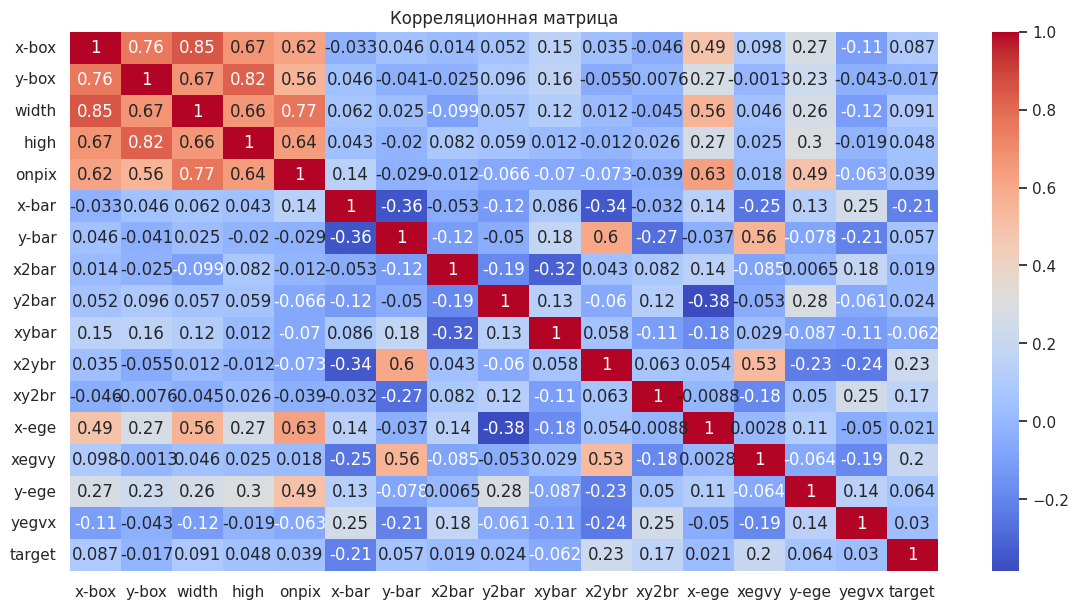

In [106]:
# Корреляционная матрица
plt.figure(figsize=(14, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

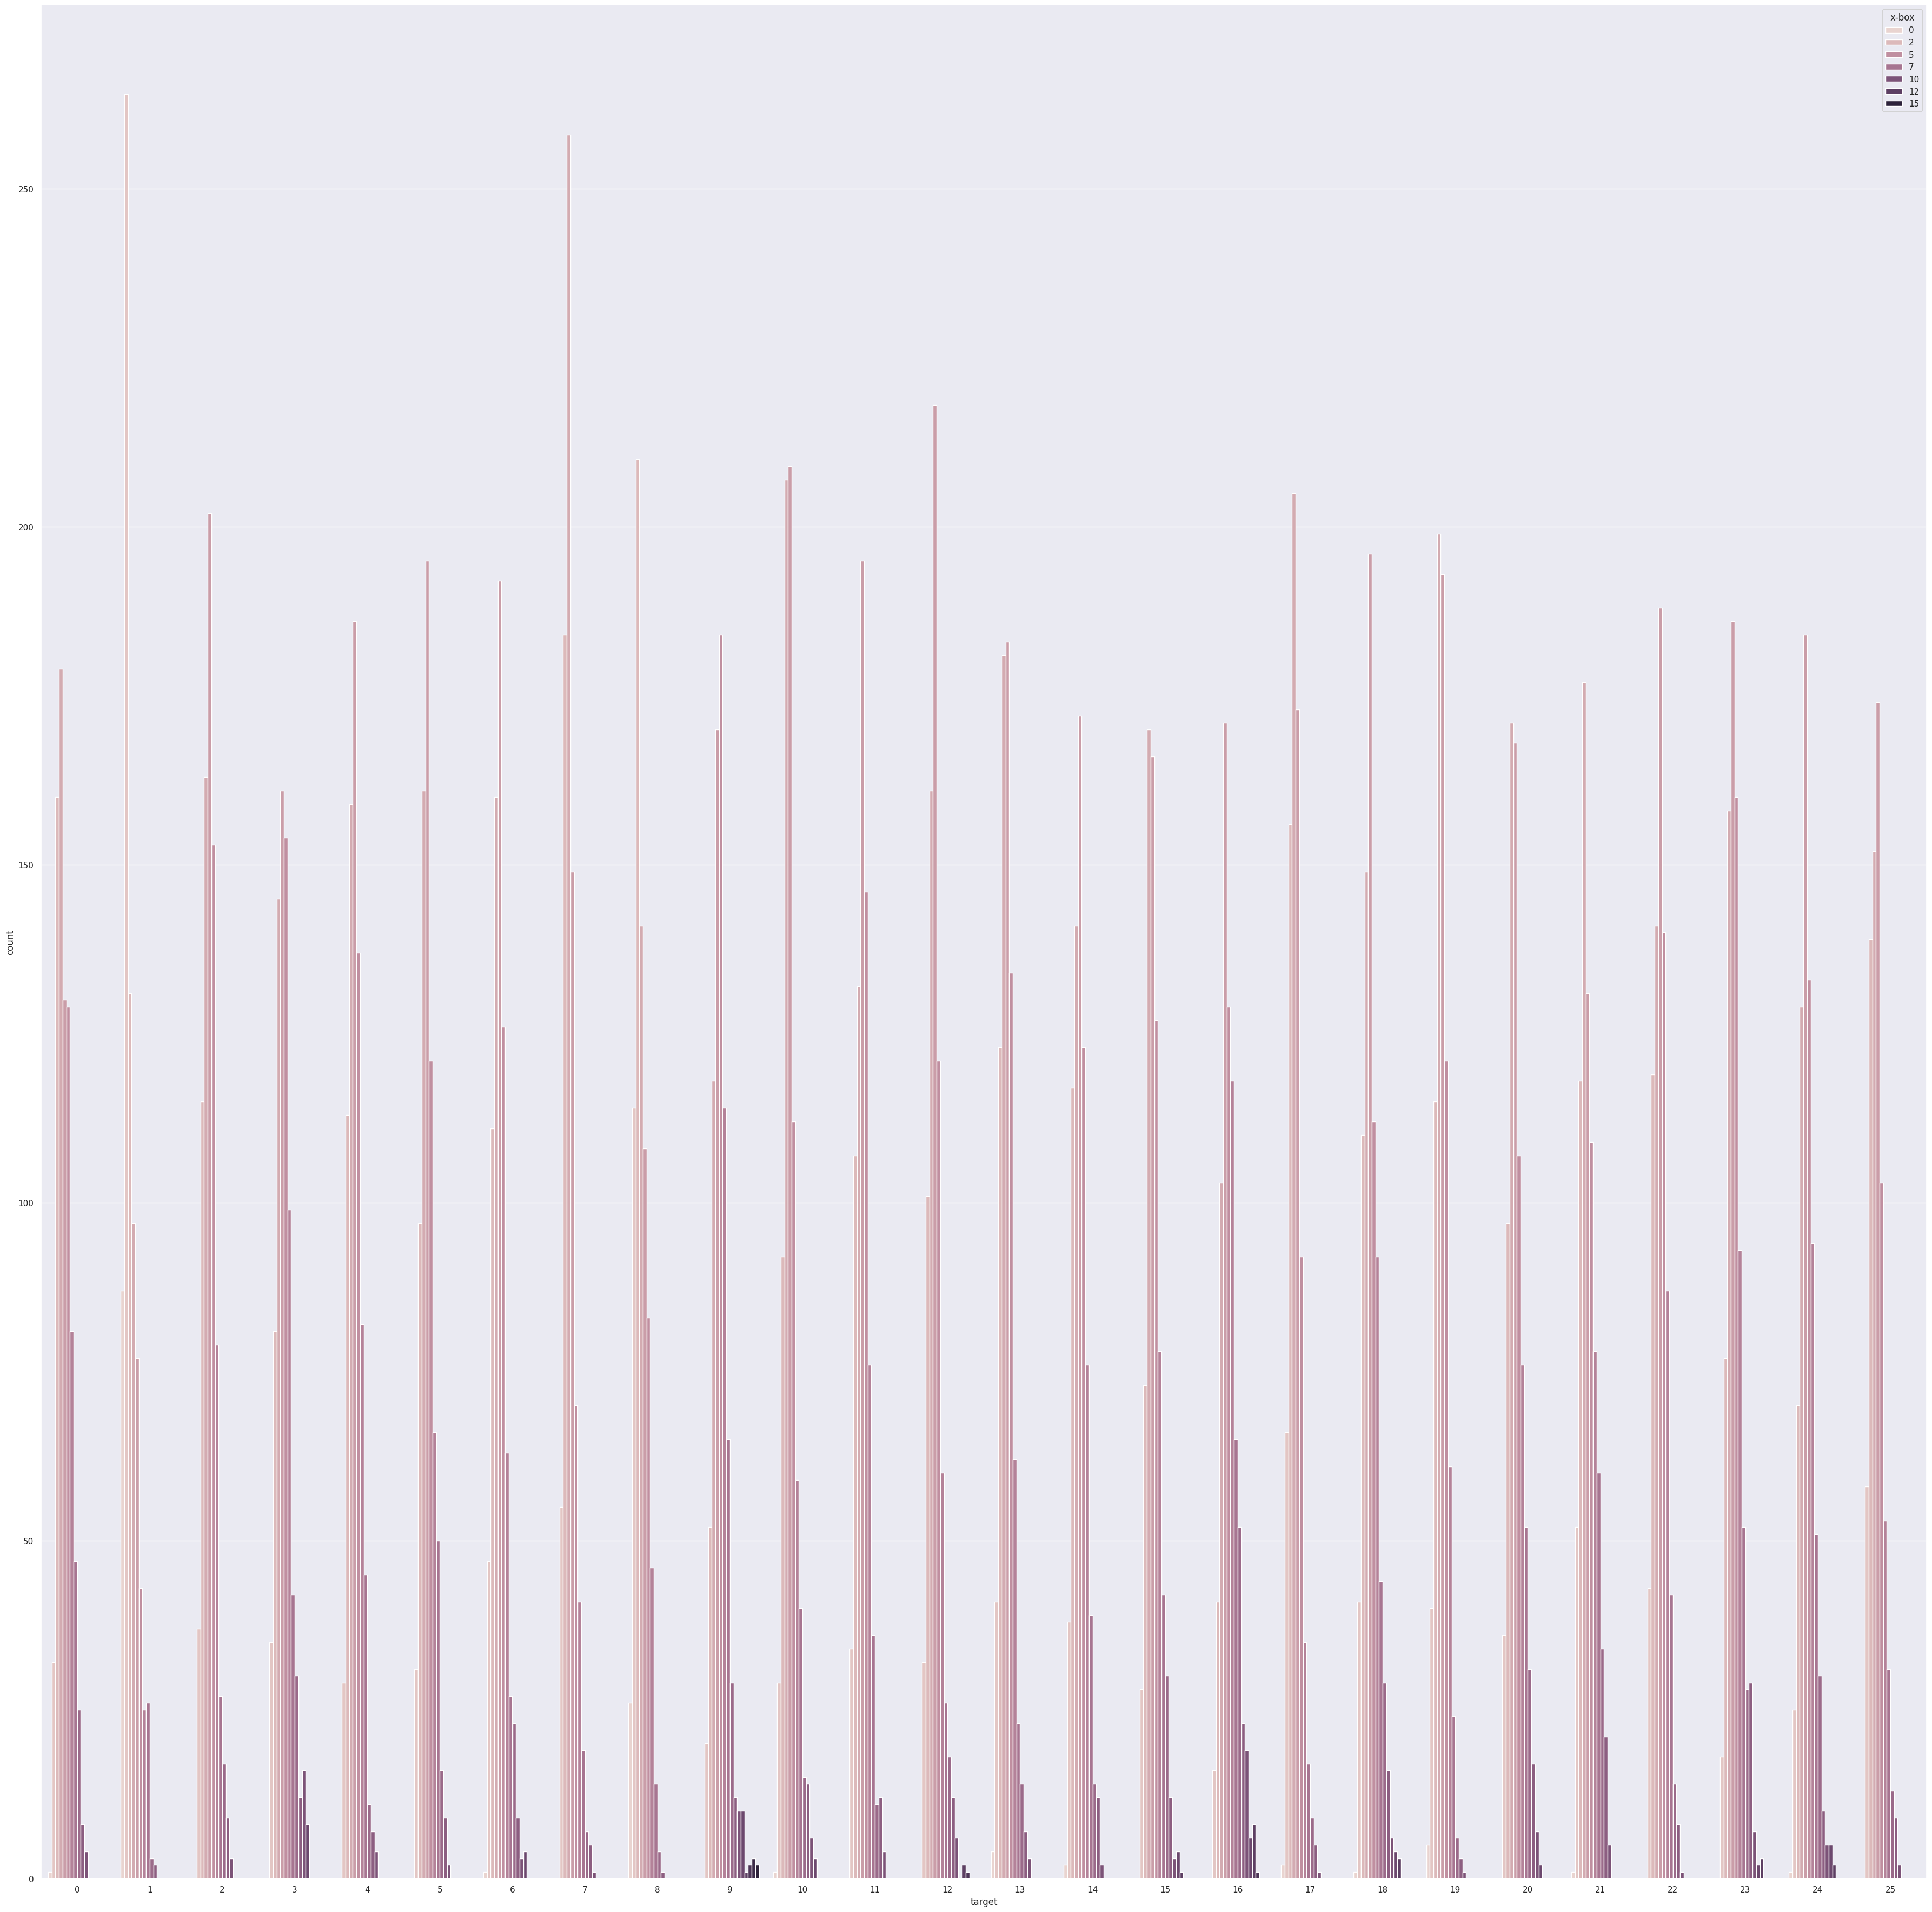

In [117]:
plt.figure(figsize=(45, 45))
sns.countplot(data=df, x="target", hue='x-box');
plt.show()

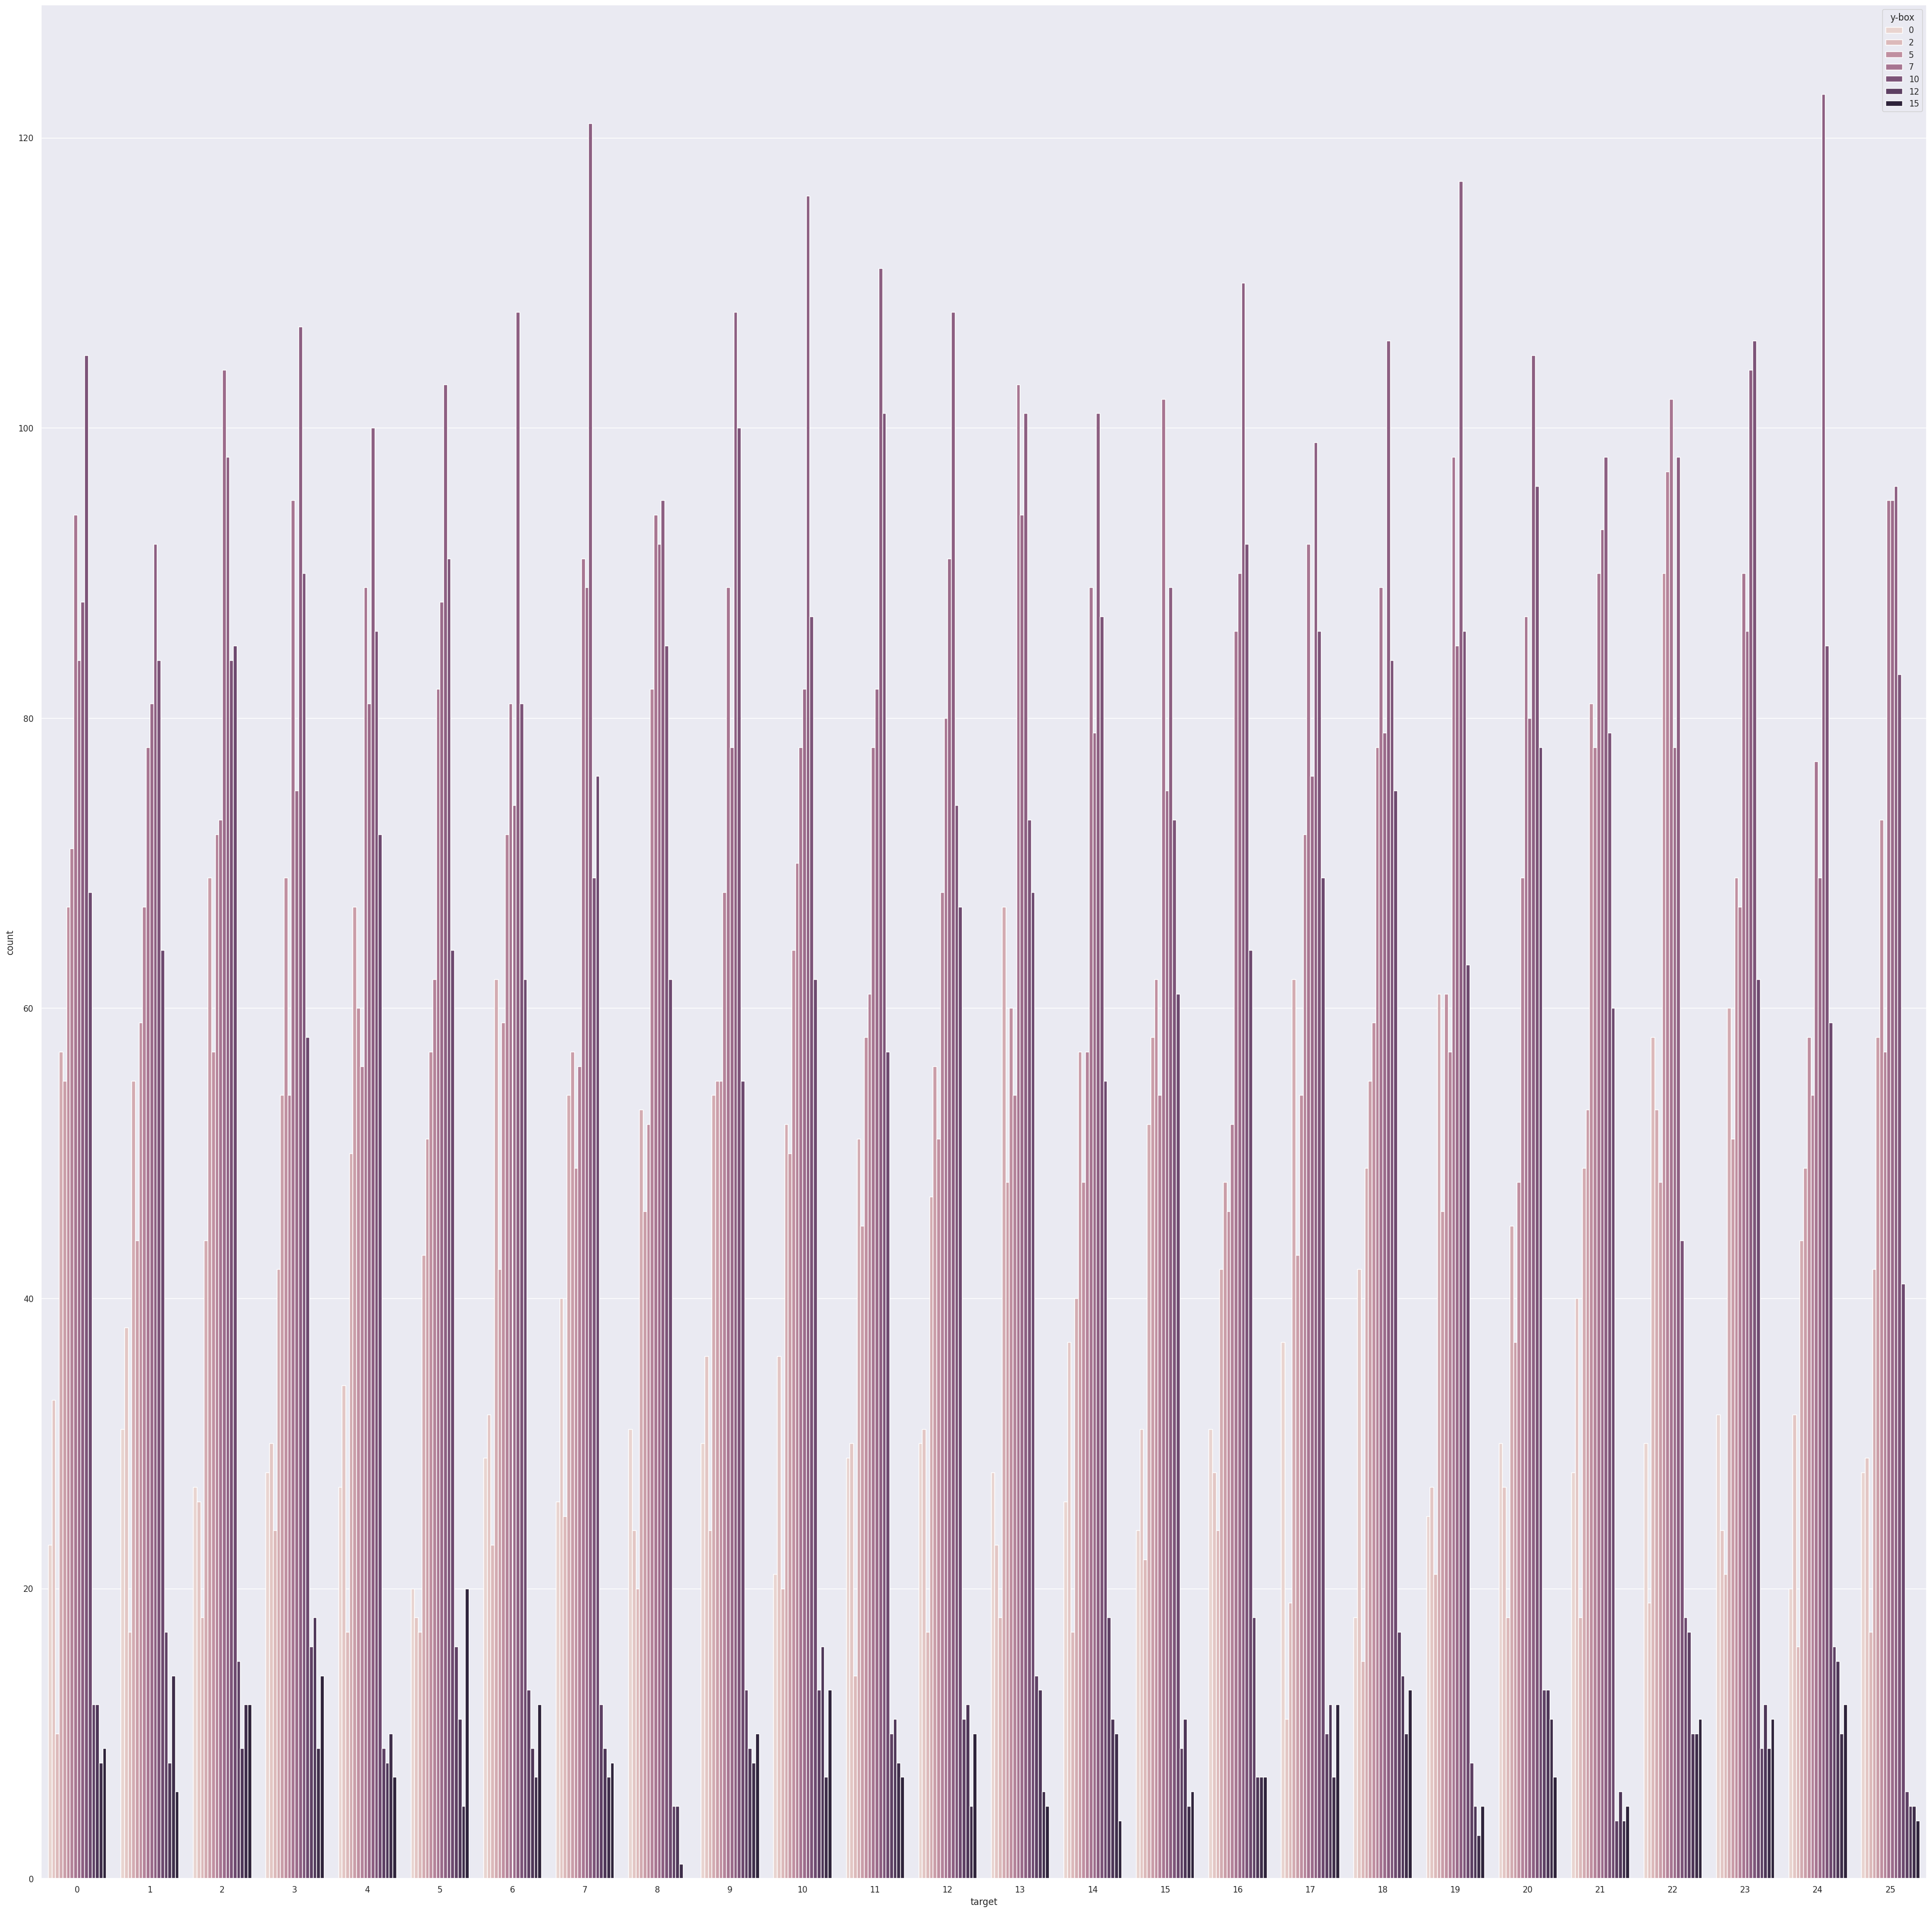

In [118]:
plt.figure(figsize=(45, 45))
sns.countplot(data=df, x="target", hue='y-box');
plt.show()

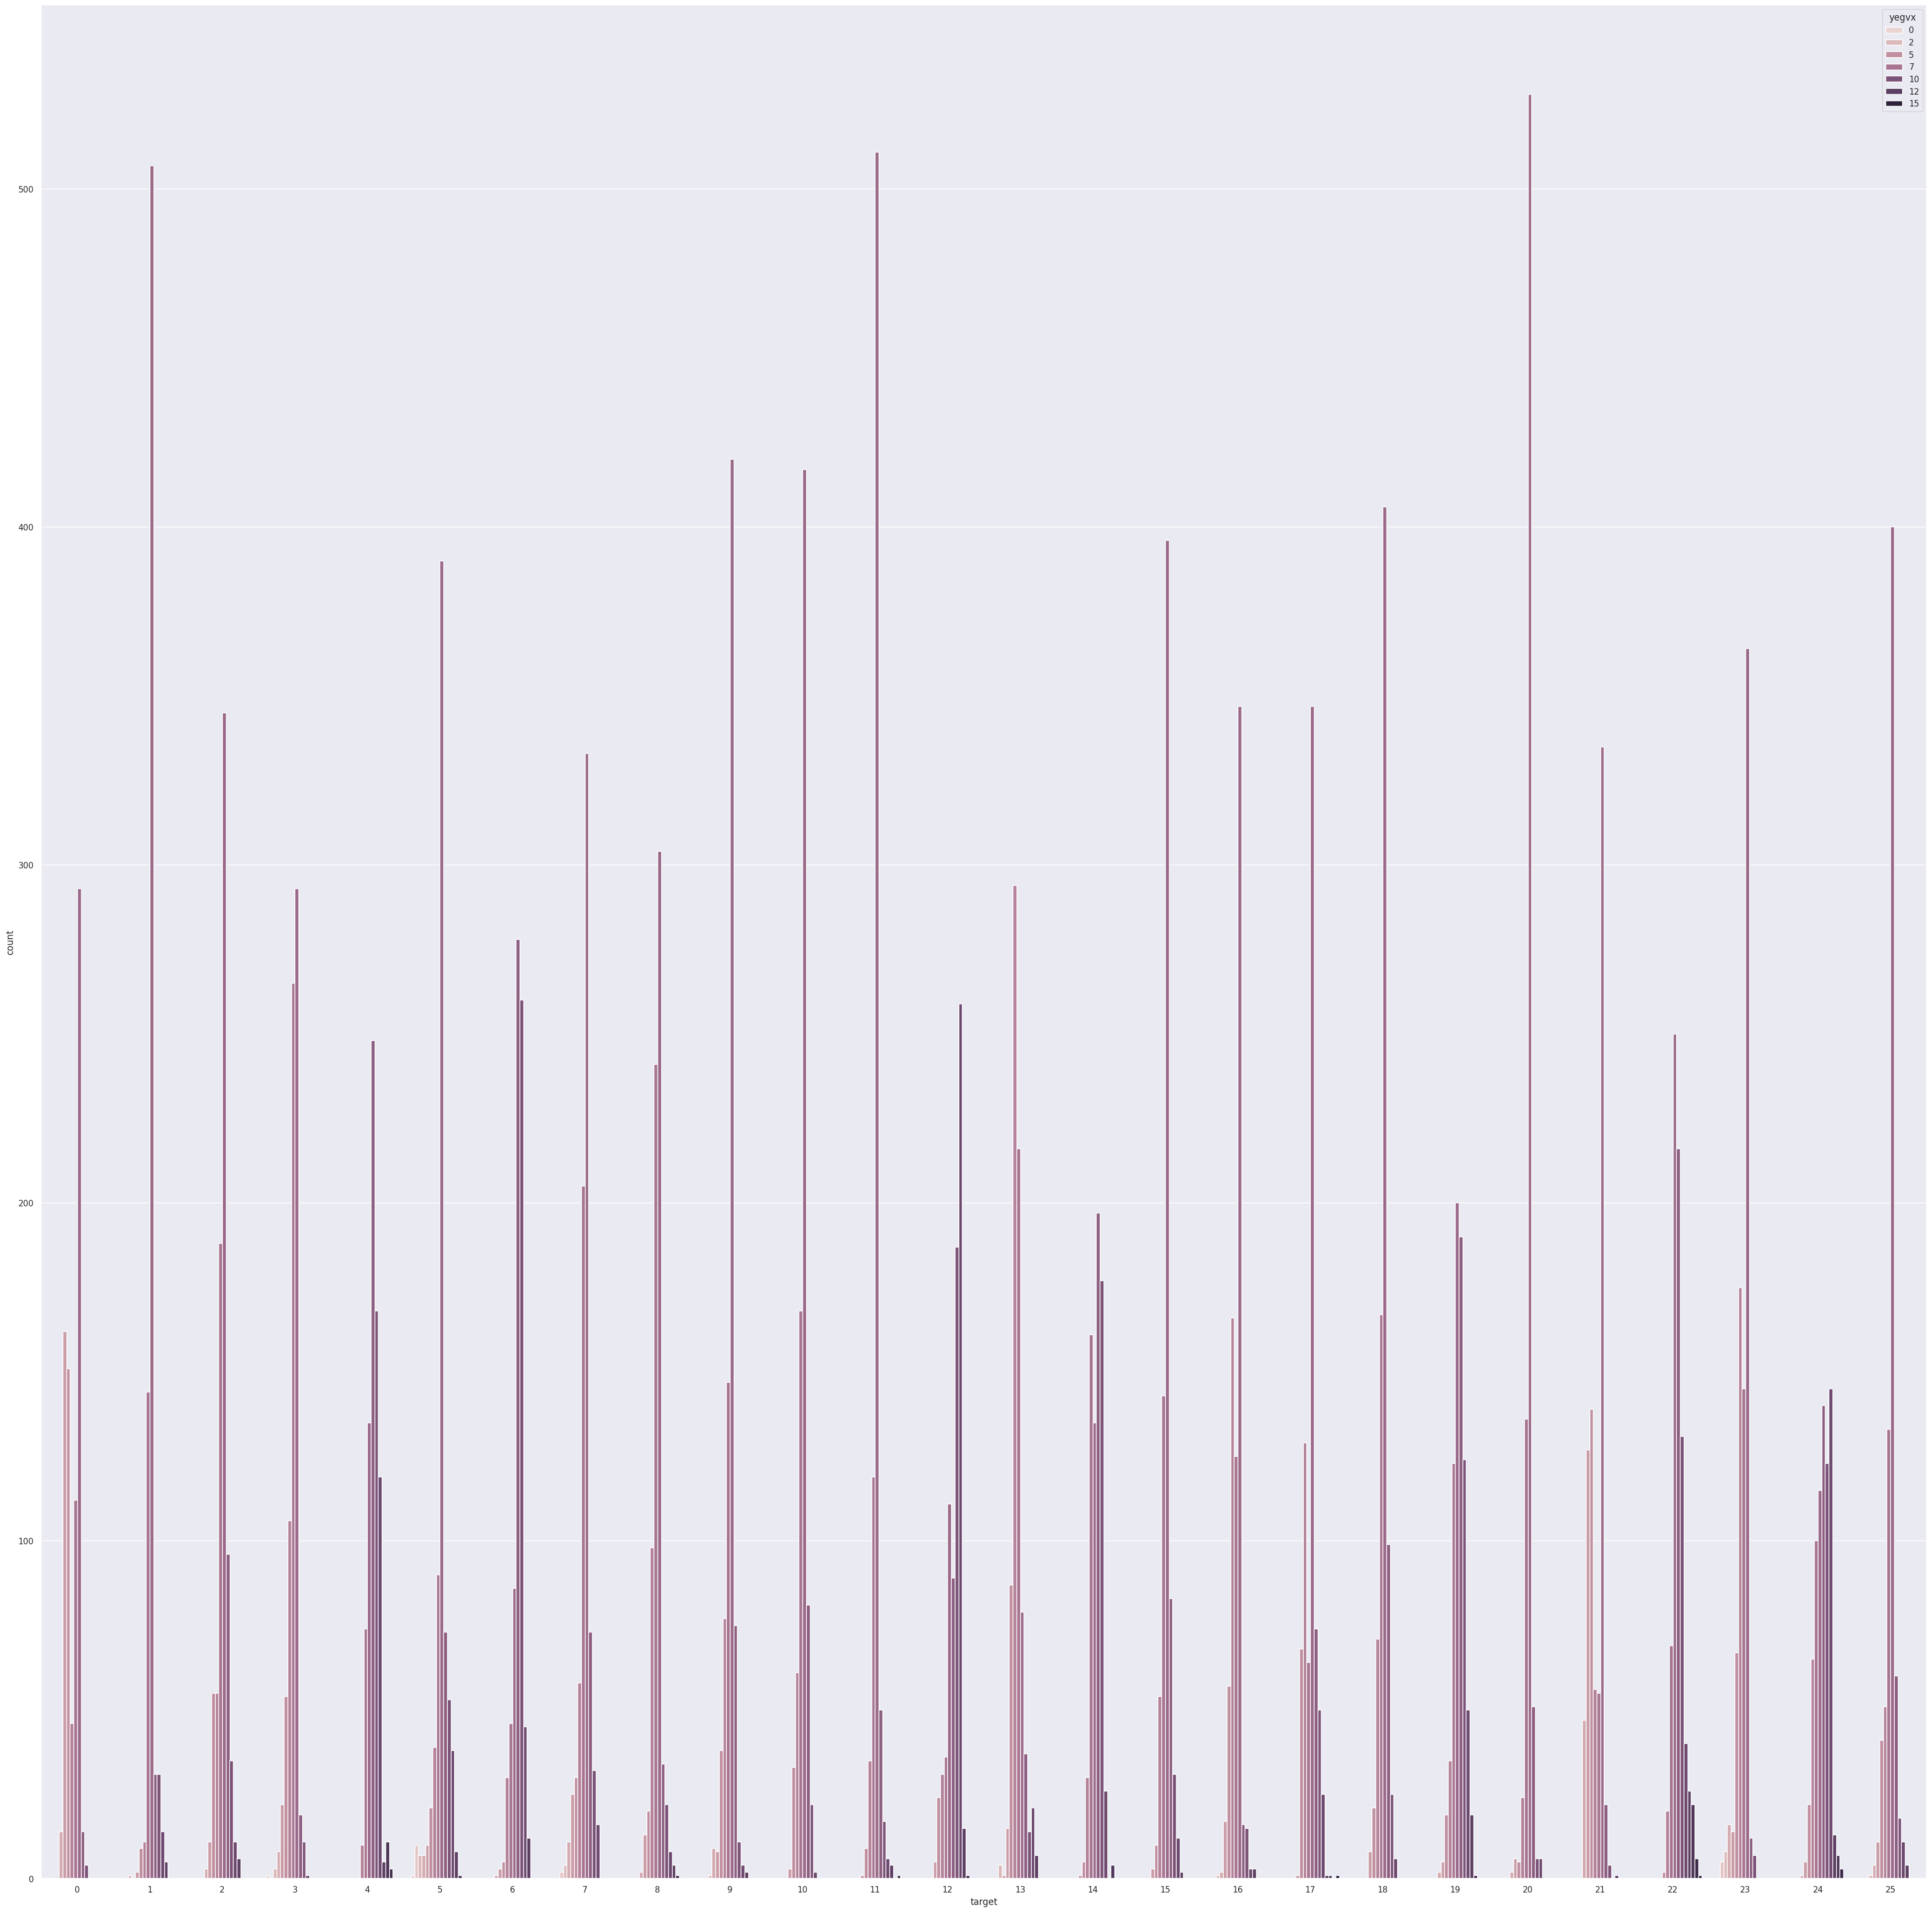

In [119]:
plt.figure(figsize=(45, 45))
sns.countplot(data=df, x="target", hue='yegvx');
plt.show()